In [2]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt


Pull galaxies from Uchuu

In [30]:
file = "/global/cfs/cdirs/desi/cosmosim/FirstGenMocks/Uchuu/LightCone/BGS_v2/BGS_LC_Uchuu.fits"

In [31]:
fits=fitsio.FITS(file)

In [32]:
#change to VF inputs
vf_fits = fits[1]['RA','DEC','Z','R_MAG_ABS','STATUS'
                       ][:]

In [33]:
#select segment of desi footprint
indesi = (vf_fits['STATUS'] & 2**1 != 0) * (vf_fits['RA']>85)*(vf_fits['RA']<302)

Various vizualizations

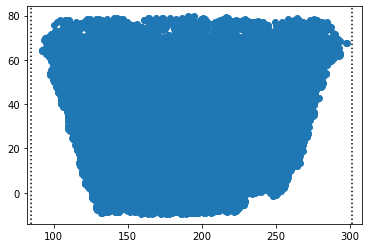

In [34]:
plt.scatter(vf_fits[indesi]['RA'][::1000],vf_fits[indesi]['DEC'][::1000])
plt.axvline(85, color="k",linestyle=":")
plt.axvline(302, color="k",linestyle=":")

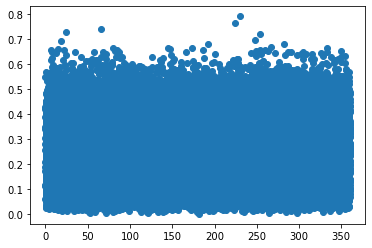

In [35]:
plt.scatter(vf_fits['RA'][::1000],vf_fits['Z'][::1000])

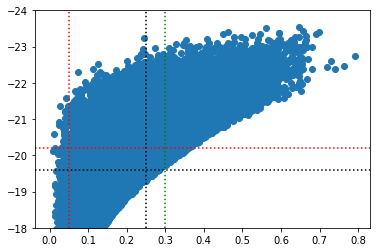

In [6]:
plt.scatter(vf_fits['Z'][::1000],vf_fits['R_MAG_ABS'][::1000])
plt.ylim((-18,-24))
plt.axhline(-19.6, color="k",linestyle=":")
plt.axvline(.25, color="k",linestyle=":")
plt.axvline(.3, color="green",linestyle=":")
plt.axhline(-20.2, color="r",linestyle=":")
plt.axvline(.05, color="r",linestyle=":")

Output the desired galaxies to a txt file

In [25]:
vf_fits=vf_fits[indesi]

In [26]:
for zmin, zmax in zip([0],[0.3]):
    sel = np.where((vf_fits['Z'] > zmin)&(vf_fits['Z'] < zmax))
    vf_fits_sel = vf_fits[sel]
    out=np.rec.fromarrays([vf_fits_sel['RA'],
                       vf_fits_sel['DEC'],
                       vf_fits_sel['Z'],
                       vf_fits_sel['R_MAG_ABS'],
                        ], 
                      dtype=[('ra',vf_fits_sel['RA'].dtype),
                             ('dec',vf_fits_sel['DEC'].dtype),
                             ('redshift',vf_fits_sel['Z'].dtype),
                             ('rabsmag',vf_fits_sel['R_MAG_ABS'].dtype),
                            ])

    np.savetxt(f"Uchuu_BGS_LC_from_{zmin}_to_{zmax}.txt",out,fmt='%s', header = "ra dec redshift rabsmag")

Add bin info to voids after running VoidFinder.py

In [ ]:
#maxs = Table.read("maxs_name.txt", format = "ascii.commented_header")


In [ ]:
# something like maxs["bin"]=(maxs["redshift"]/0.05).astype(int)

In [ ]:
#maxs.write('maxs_binned.txt', format='ascii', overwrite=True)  